In [139]:
import sympy as sp
sp.init_printing(use_latex='mathjax')
from IPython.display import display

In [140]:
t = sp.Symbol('t', real  = True)
omega_o = sp.Symbol('\omega_o', real = True)
xdot = sp.Symbol('\dot{x}', real = True)
xddot = sp.Symbol('\ddot{x}', real = True)
To = sp.Symbol('T_o', real = True)
T1 = sp.Symbol('T_1', real = True)
T2 = sp.Symbol('T_2', real = True)
Do = sp.Symbol('D_o', real = True)
D1 = sp.Symbol('D_1', real = True)
D2 = sp.Symbol('D_2', real = True)
x1 = sp.Symbol('x_1', real = True)
x2 = sp.Symbol('x_2', real = True)
xo = sp.Symbol('x_o', real = True)
x = sp.Symbol('x', real = True)
xddot = sp.Symbol('\ddot{x}', real = True)
epsilon = sp.Symbol('\epsilon', real = True)
A = sp.Symbol('A', real = True)
Abar = sp.Symbol('Abar', real = True)
alpha = sp.Symbol('alpha', real = True)
alpha_o = sp.Symbol('alpha_o', real = True)
beta = sp.Symbol('beta', real = True)
beta_o = sp.Symbol('beta_o', real = True)
m = sp.Symbol('m', real = True)
k1 = sp.Symbol('k_1', real = True)
k3 = sp.Symbol('k_3', real  = True)
g = sp.Symbol('g', real = True)
phi = sp.Symbol('phi', real = True)

G = sp.Symbol('G', real = True)
E = sp.Symbol('E', real = True)
F = sp.Symbol('F', real = True)

## Admir Makas  
## Take Home Exam #2

### Problem 1

Below is the equation to be solved using methhod of multiple scales

### $\ddot{x} + \frac{k_1}{m}x = g - \epsilon(\frac{k_3}{m}x^3)$

Since there is a constant forcing term the above expression will have to be shifted to the equilibrium position before method of multiple scales can be applied.

Equilibrium position position can be calculated by setting $\ddot{x} = 0$ and solving for equilibrium points.  

For this instance the shifing term will be denoted as $\phi$ such that $x_1 = x + \phi$

In [141]:
FShift=xddot + (k1/m)*x1 + (k3/m)*x1**3 - g
FShift

                            3
               k₁⋅x₁   k₃⋅x₁ 
\ddot{x} - g + ───── + ──────
                 m       m   

In [142]:
FShift=FShift.subs(x1, x + phi)
FShift.expand()

                                 3         2             2       3
               k₁⋅φ   k₁⋅x   k₃⋅φ    3⋅k₃⋅φ ⋅x   3⋅k₃⋅φ⋅x    k₃⋅x 
\ddot{x} - g + ──── + ──── + ───── + ───────── + ───────── + ─────
                m      m       m         m           m         m  

In the above expression following terms sum to zero ($\frac{k_1 \phi}{m} + \frac{k_3 \phi^3}{m} - g$).  
This leaves the following equation that can be used for analysis

In [143]:
Feq = xddot + FShift.expand().coeff(x)*x + FShift.expand().coeff(x**2)*x**2 + FShift.expand().coeff(x**3)*x**3
Feq

                   2       3     ⎛           2⎞
           3⋅k₃⋅φ⋅x    k₃⋅x      ⎜k₁   3⋅k₃⋅φ ⎟
\ddot{x} + ───────── + ───── + x⋅⎜── + ───────⎟
               m         m       ⎝m       m   ⎠

To make the algebra easier to deal with the above equation will be simplified to the following form:

In [144]:
Feq_Simp = xddot + G*x + E*x**2 + F*x**3
Feq_Simp

   2      3                 
E⋅x  + F⋅x  + G⋅x + \ddot{x}

Where $G = \frac{k_1}{m} + \frac{3k_3\phi^2}{m}$, $E = \frac{3k_3\phi}{m}$, and $F = \frac{k_3}{m}$

Next define definitions for the differential operators $\frac{d}{dt}$ and $\frac{d^2}{dt^2}$

In [145]:
ddt = Do + epsilon*D1 + epsilon**2*D2
ddt

                         2     
D₁⋅\epsilon + D₂⋅\epsilon  + Dₒ

In [146]:
ddt2 = (ddt*ddt).expand().subs(epsilon, 0) +\
(ddt*ddt).expand().coeff(epsilon)*epsilon +\
(ddt*ddt).expand().coeff(epsilon**2)*epsilon**2
ddt2

                     2           2 ⎛  2          ⎞
2⋅D₁⋅Dₒ⋅\epsilon + Dₒ  + \epsilon ⋅⎝D₁  + 2⋅D₂⋅Dₒ⎠

Next step is to define assumed solution for the system, which can be seen below:

In [203]:
x = xo + epsilon*x1
x

\epsilon⋅x₁ + xₒ

Next define the complete expression using definitions above

In [208]:
Fe = x*ddt2 + G*x + epsilon*(E*x**2 + F*x**3)
Fe

                                ⎛                    2                       3
G⋅(\epsilon⋅x₁ + xₒ) + \epsilon⋅⎝E⋅(\epsilon⋅x₁ + xₒ)  + F⋅(\epsilon⋅x₁ + xₒ) 

⎞                      ⎛                     2           2 ⎛  2          ⎞⎞
⎠ + (\epsilon⋅x₁ + xₒ)⋅⎝2⋅D₁⋅Dₒ⋅\epsilon + Dₒ  + \epsilon ⋅⎝D₁  + 2⋅D₂⋅Dₒ⎠⎠

In [209]:
Fe = Fe.expand()
Fe

  2         3        2         2                      2                       
D₁ ⋅\epsilon ⋅x₁ + D₁ ⋅\epsilon ⋅xₒ + 2⋅D₁⋅Dₒ⋅\epsilon ⋅x₁ + 2⋅D₁⋅Dₒ⋅\epsilon⋅

                     3                      2        2                 2      
xₒ + 2⋅D₂⋅Dₒ⋅\epsilon ⋅x₁ + 2⋅D₂⋅Dₒ⋅\epsilon ⋅xₒ + Dₒ ⋅\epsilon⋅x₁ + Dₒ ⋅xₒ + 

          3   2               2                      2             4   3      
E⋅\epsilon ⋅x₁  + 2⋅E⋅\epsilon ⋅x₁⋅xₒ + E⋅\epsilon⋅xₒ  + F⋅\epsilon ⋅x₁  + 3⋅F

         3   2                  2      2                3                     
⋅\epsilon ⋅x₁ ⋅xₒ + 3⋅F⋅\epsilon ⋅x₁⋅xₒ  + F⋅\epsilon⋅xₒ  + G⋅\epsilon⋅x₁ + G⋅

  
xₒ

From the expression above extract terms associated with $\epsilon^0$, $\epsilon^1$

### Expression for $x_o$

In [206]:
f1 = Fe.subs(epsilon, 0)
f1

  2          
Dₒ ⋅xₒ + G⋅xₒ

### Next define equation for $x_1$

In [207]:
f2 = Fe.coeff(epsilon)
f2

               2          2       3       
2⋅D₁⋅Dₒ⋅xₒ + Dₒ ⋅x₁ + E⋅xₒ  + F⋅xₒ  + G⋅x₁

In [152]:
f2_lhs = sp.expand(f2.coeff(x1)*x1)
f2_lhs

  2          
Dₒ ⋅x₁ + G⋅x₁

In [153]:
f2_rhs = sp.expand(f2.coeff(xo**3)*xo**3 + f2.coeff(xo)*xo) + f2.coeff(xo**2)*xo**2
f2_rhs

                 2       3
2⋅D₁⋅Dₒ⋅xₒ + E⋅xₒ  + F⋅xₒ 

In [154]:
display(f2_lhs, '=', -f2_rhs)

  2          
Dₒ ⋅x₁ + G⋅x₁

'='

                  2       3
-2⋅D₁⋅Dₒ⋅xₒ - E⋅xₒ  - F⋅xₒ 

#### For the first ODE $D_{o}^{2} x_{o} + G x_{o} = 0$ assume following solution

In [155]:
x_o = A(T1, T2)*sp.exp(sp.I*sp.sqrt(G)*To) +\
        sp.conjugate(A(T1, T2))*sp.exp(-sp.I*sp.sqrt(G)*To)
x_o

               ___            ___             
           ⅈ⋅╲╱ G ⋅Tₒ    -ⅈ⋅╲╱ G ⋅Tₒ _________
A(T₁, T₂)⋅ℯ           + ℯ           ⋅A(T₁, T₂)

Assumed solution satisfies the characteristic portion of the ODE

In [156]:
(sp.diff(x_o, To, To) + (G)*x_o).expand()

0

### Next substitute expression into $x_1$  

In [200]:
f2_rhs1 = sp.expand(-f2_rhs.subs(xo, x_o))
f2_rhs1

                         ___                    ___                           
                     ⅈ⋅╲╱ G ⋅Tₒ            -ⅈ⋅╲╱ G ⋅Tₒ _________      2       
- 2⋅D₁⋅Dₒ⋅A(T₁, T₂)⋅ℯ           - 2⋅D₁⋅Dₒ⋅ℯ           ⋅A(T₁, T₂) - E⋅A (T₁, T₂

         ___                                          ___             2       
   2⋅ⅈ⋅╲╱ G ⋅Tₒ                 _________      -2⋅ⅈ⋅╲╱ G ⋅Tₒ _________       3
)⋅ℯ             - 2⋅E⋅A(T₁, T₂)⋅A(T₁, T₂) - E⋅ℯ             ⋅A(T₁, T₂)  - F⋅A 

                ___                          ___                              
          3⋅ⅈ⋅╲╱ G ⋅Tₒ        2          ⅈ⋅╲╱ G ⋅Tₒ _________                 
(T₁, T₂)⋅ℯ             - 3⋅F⋅A (T₁, T₂)⋅ℯ          ⋅A(T₁, T₂) - 3⋅F⋅A(T₁, T₂)⋅

      ___             2             ___             3
 -ⅈ⋅╲╱ G ⋅Tₒ _________       -3⋅ⅈ⋅╲╱ G ⋅Tₒ _________ 
ℯ           ⋅A(T₁, T₂)  - F⋅ℯ             ⋅A(T₁, T₂) 

### Keep only real part

In [199]:
f2_rhs_re = sp.expand(f2_rhs1.coeff(2*D1*A(T1, T2))*(2*D1*A(T1, T2)))\
            + sp.expand(f2_rhs1.coeff(A(T1, T2)**2)*(A(T1, T2)**2))\
                + sp.expand(f2_rhs1.coeff(A(T1, T2)**3)*(A(T1, T2)**3))\
                    + sp.expand(f2_rhs1.coeff(E*A(T1, T2))*(sp.nsimplify(1/2)*E*A(T1, T2)))
f2_rhs_re

                         ___                          ___                     
                     ⅈ⋅╲╱ G ⋅Tₒ      2          2⋅ⅈ⋅╲╱ G ⋅Tₒ               ___
- 2⋅D₁⋅Dₒ⋅A(T₁, T₂)⋅ℯ           - E⋅A (T₁, T₂)⋅ℯ             - E⋅A(T₁, T₂)⋅A(T

                             ___                          ___             
______      3          3⋅ⅈ⋅╲╱ G ⋅Tₒ        2          ⅈ⋅╲╱ G ⋅Tₒ _________
₁, T₂) - F⋅A (T₁, T₂)⋅ℯ             - 3⋅F⋅A (T₁, T₂)⋅ℯ          ⋅A(T₁, T₂)

From above exprssion two terms will drive the system at resonance, therefore we must ensure that they sum to zero.

**extract resonant term**

In [159]:
f2_res = (f2_rhs_re.coeff(sp.exp(sp.I*To*sp.sqrt(G)))*\
            sp.exp(sp.I*To*sp.sqrt(G))).expand()
f2_res

                         ___                          ___             
                     ⅈ⋅╲╱ G ⋅Tₒ        2          ⅈ⋅╲╱ G ⋅Tₒ _________
- 2⋅D₁⋅Dₒ⋅A(T₁, T₂)⋅ℯ           - 3⋅F⋅A (T₁, T₂)⋅ℯ          ⋅A(T₁, T₂)

Summation of the two terms above must be equal to zero.

**Define non-resonant terms for later use:**

In [160]:
f2_non_res = f2_rhs_re - f2_res
f2_non_res

                      ___                                                  ___
     2          2⋅ⅈ⋅╲╱ G ⋅Tₒ               _________      3          3⋅ⅈ⋅╲╱ G 
- E⋅A (T₁, T₂)⋅ℯ             - E⋅A(T₁, T₂)⋅A(T₁, T₂) - F⋅A (T₁, T₂)⋅ℯ         

   
⋅Tₒ
   

Assume A is of the form $\frac{1}{2} \alpha e^{i \beta}$ and substitute into right hand side of equation for $x_1$ 

In [161]:
A_guess = sp.nsimplify(1/2)*alpha(T1)*sp.exp(sp.I*beta(T1))
A_guess

       ⅈ⋅β(T₁)
α(T₁)⋅ℯ       
──────────────
      2       

$\bar{A}$ definition

In [162]:
Abar_guess = sp.nsimplify(1/2)*alpha(T1)*sp.exp(-sp.I*beta(T1))
Abar_guess

       -ⅈ⋅β(T₁)
α(T₁)⋅ℯ        
───────────────
       2       

Substitute assumed solution into the right hand side of equation for $x_1$

In [163]:
f2_res2 = f2_res.subs(A(T1, T2), A_guess)

f2_res2 = f2_res2.subs(sp.conjugate(alpha(T1)), alpha(T1))

f2_res2 = f2_res2.subs(sp.conjugate(sp.exp(sp.I*beta(T1))),\
                       sp.exp(-sp.I*beta(T1)))
f2_res2

                                                              ___   
                            ___           3      ⅈ⋅β(T₁)  ⅈ⋅╲╱ G ⋅Tₒ
               ⅈ⋅β(T₁)  ⅈ⋅╲╱ G ⋅Tₒ   3⋅F⋅α (T₁)⋅ℯ       ⋅ℯ          
- D₁⋅Dₒ⋅α(T₁)⋅ℯ       ⋅ℯ           - ───────────────────────────────
                                                    8               

Next get the derivatives per the expression above, there is only one.

To perform the differentiation, need to extract the values that need to be differentiated.

#### Term for $D_o D_1$ differentiation:

In [164]:
f2_res2_DoD1 = f2_res2.coeff(-D1*Do)
f2_res2_DoD1 = -f2_res2_DoD1.expand()
f2_res2_DoD1

                     ___   
        ⅈ⋅β(T₁)  ⅈ⋅╲╱ G ⋅Tₒ
-α(T₁)⋅ℯ       ⋅ℯ          

Next perform differentiation with respect to $D_o D_1$ term 

In [165]:
f2_res2_DoD1_D = sp.diff(f2_res2_DoD1, To, T1)
f2_res2_DoD1_D.simplify()

                                           ⎛  ___           ⎞
  ___ ⎛       d              d        ⎞  ⅈ⋅⎝╲╱ G ⋅Tₒ + β(T₁)⎠
╲╱ G ⋅⎜α(T₁)⋅───(β(T₁)) - ⅈ⋅───(α(T₁))⎟⋅ℯ                    
      ⎝      dT₁            dT₁       ⎠                      

Extract constant term:

In [166]:
f2_res2_C = f2_res2.coeff(alpha(T1)**3)*(alpha(T1)**3)
f2_res2_C.expand()

                          ___    
      3      ⅈ⋅β(T₁)  ⅈ⋅╲╱ G ⋅Tₒ 
-3⋅F⋅α (T₁)⋅ℯ       ⋅ℯ           
─────────────────────────────────
                8                

Combine all terms together to get differentiated expression

In [197]:
f2_rhs_final = sp.expand(f2_res2_DoD1_D + f2_res2_C)
f2_rhs_final.simplify()

⎛       3                                                  ⎞    ⎛  ___        
⎜  3⋅F⋅α (T₁)     ___        d               ___  d        ⎟  ⅈ⋅⎝╲╱ G ⋅Tₒ + β(
⎜- ────────── + ╲╱ G ⋅α(T₁)⋅───(β(T₁)) - ⅈ⋅╲╱ G ⋅───(α(T₁))⎟⋅ℯ                
⎝      8                    dT₁                  dT₁       ⎠                  

   ⎞
T₁)⎠
    
    

Extract real and imaginary parts needed to solve for $\alpha$ and $\beta$.

In [198]:
f2_rhs_final_re = f2_rhs_final.expand().subs(sp.I,0)
f2_rhs_final_re.simplify()

       3                             
  3⋅F⋅α (T₁)     ___        d        
- ────────── + ╲╱ G ⋅α(T₁)⋅───(β(T₁))
      8                    dT₁       

In [169]:
test = f2_rhs_final.expand()
test
f2_rhs_final_im = sp.expand(test.coeff(sp.I))*sp.exp(-sp.I*(sp.sqrt(G)*To + beta(T1)))

f2_rhs_final_im.simplify()

   ___  d        
-╲╱ G ⋅───(α(T₁))
       dT₁       

From the imaginary part $\alpha$ is a constant $\alpha = \alpha_c$

Next solve for $\beta$:

In [170]:
betaP = sp.solve(f2_rhs_final_re, sp.diff(beta(T1), T1))
betaP

⎡     2    ⎤
⎢3⋅F⋅α (T₁)⎥
⎢──────────⎥
⎢     ___  ⎥
⎣ 8⋅╲╱ G   ⎦

In [171]:
betaP1 = betaP[0].subs(alpha(T1), alpha)
betaP1

      2
 3⋅F⋅α 
───────
    ___
8⋅╲╱ G 

Next solve for $\beta$ by integrating

In [172]:
beta_sol = sp.integrate(betaP1, T1)
beta_sol

        2
3⋅F⋅T₁⋅α 
─────────
     ___ 
 8⋅╲╱ G  

Next plug in the solution for A into the expression for $x_1$.   

First start by defining the solution for A and $\bar{A}$

In [173]:
A_sol = sp.nsimplify(1/2)*alpha*sp.exp(sp.I*(beta_sol))
A_sol

             2
   3⋅ⅈ⋅F⋅T₁⋅α 
   ───────────
         ___  
     8⋅╲╱ G   
α⋅ℯ           
──────────────
      2       

In [174]:
Abar_Sol = sp.nsimplify(1/2)*alpha*sp.exp(-sp.I*(beta_sol))
Abar_Sol

              2 
   -3⋅ⅈ⋅F⋅T₁⋅α  
   ─────────────
          ___   
      8⋅╲╱ G    
α⋅ℯ             
────────────────
       2        

Above solution for A checks out since the secular term in expression for $x_1$ sums to zero as seen below.

In short: $- 2 D_{1} D_{o} A{\left (T_{1},T_{2} \right )} e^{i \sqrt{G} T_{o}} - 3 F A^{2}{\left (T_{1},T_{2} \right )} e^{i \sqrt{G} T_{o}} \overline{A{\left (T_{1},T_{2} \right )}} = 0$

In [175]:
test = A_sol*sp.exp(sp.I*sp.sqrt(G)*To)
test = 2*sp.diff(test, To, T1)

check = -test - (3*F)*A_sol**2*Abar_Sol*sp.exp(sp.I*To*sp.sqrt(G))
check

0

Since solution for A above will make the secular terms sum to zero, expression for $x_1$ on the right hand side will become the following (i.e. non-resonant terms):

$- E A^{2}{\left (T_{1},T_{2} \right )} e^{2 i \sqrt{G} T_{o}} - E A{\left (T_{1},T_{2} \right )} \overline{A{\left (T_{1},T_{2} \right )}} - F A^{3}{\left (T_{1},T_{2} \right )} e^{3 i \sqrt{G} T_{o}}$

In [176]:
f2_rhs_wtA = f2_non_res.subs(sp.conjugate(A(T1,T2)), Abar_Sol)
f2_rhs_wtA = f2_rhs_wtA.subs(A(T1,T2), A_sol)
f2_rhs_wtA.expand()

                                2                                        2
                      3⋅ⅈ⋅F⋅T₁⋅α                               9⋅ⅈ⋅F⋅T₁⋅α 
                      ───────────                              ───────────
              ___           ___                        ___           ___  
     2  2⋅ⅈ⋅╲╱ G ⋅Tₒ    4⋅╲╱ G         2      3  3⋅ⅈ⋅╲╱ G ⋅Tₒ    8⋅╲╱ G   
  E⋅α ⋅ℯ            ⋅ℯ              E⋅α    F⋅α ⋅ℯ            ⋅ℯ           
- ─────────────────────────────── - ──── - ───────────────────────────────
                 4                   4                    8               

**Extract 3 terms above for simplicity:**

In [177]:
f2_rhs_wtA1 = f2_rhs_wtA.coeff(alpha**3)*alpha**3
f2_rhs_wtA1.simplify()

           ⎛        2         ⎞ 
       3⋅ⅈ⋅⎝3⋅F⋅T₁⋅α  + 8⋅G⋅Tₒ⎠ 
       ──────────────────────── 
                   ___          
    3          8⋅╲╱ G           
-F⋅α ⋅ℯ                         
────────────────────────────────
               8                

In [178]:
f2_rhs_wtA2 = f2_rhs_wtA.coeff(sp.exp(sp.I*2*To*sp.sqrt(G)))\
        *sp.exp(sp.I*2*To*sp.sqrt(G))
f2_rhs_wtA2.simplify()

         ⎛        2         ⎞ 
       ⅈ⋅⎝3⋅F⋅T₁⋅α  + 8⋅G⋅Tₒ⎠ 
       ────────────────────── 
                  ___         
    2         4⋅╲╱ G          
-E⋅α ⋅ℯ                       
──────────────────────────────
              4               

In [179]:
f2_rhs_wtA3 = -(E*alpha**2)/4
f2_rhs_wtA3.simplify()

    2 
-E⋅α  
──────
  4   

Since expression for $x_1$ is a linear ODE the particular solution can be solved  in 3 parts.  

- Part 1, particular solution for:
$- \frac{F \alpha^{3}}{8} e^{\frac{3 i}{8 \sqrt{G}} \left(3 F T_{1} \alpha^{2} + 8 G T_{o}\right)}$

- Part 2, particular solution for:
$- \frac{E \alpha^{2}}{4} e^{\frac{i}{4 \sqrt{G}} \left(3 F T_{1} \alpha^{2} + 8 G T_{o}\right)}$  

- Part 3, particular solution for:
$- \frac{E \alpha^{2}}{4}$

**For part 1 the solution becomes:**

In [180]:
x_11 = sp.simplify(-f2_rhs_wtA1*((1)/(G*8)))
x_11

          ⎛        2         ⎞
      3⋅ⅈ⋅⎝3⋅F⋅T₁⋅α  + 8⋅G⋅Tₒ⎠
      ────────────────────────
                  ___         
   3          8⋅╲╱ G          
F⋅α ⋅ℯ                        
──────────────────────────────
             64⋅G             

Check

In [181]:
sp.diff(x_11, To, To) + G*x_11

           ⎛        2         ⎞ 
       3⋅ⅈ⋅⎝3⋅F⋅T₁⋅α  + 8⋅G⋅Tₒ⎠ 
       ──────────────────────── 
                   ___          
    3          8⋅╲╱ G           
-F⋅α ⋅ℯ                         
────────────────────────────────
               8                

**For part 2 solution becomes:**

In [182]:
x_12 = sp.simplify(-f2_rhs_wtA2*((1)/(3*G)))
x_12

        ⎛        2         ⎞
      ⅈ⋅⎝3⋅F⋅T₁⋅α  + 8⋅G⋅Tₒ⎠
      ──────────────────────
                 ___        
   2         4⋅╲╱ G         
E⋅α ⋅ℯ                      
────────────────────────────
            12⋅G            

Check

In [183]:
sp.diff(x_12, To, To) + G*x_12

         ⎛        2         ⎞ 
       ⅈ⋅⎝3⋅F⋅T₁⋅α  + 8⋅G⋅Tₒ⎠ 
       ────────────────────── 
                  ___         
    2         4⋅╲╱ G          
-E⋅α ⋅ℯ                       
──────────────────────────────
              4               

**For part 3 solution becomes:**

In [184]:
x_13 = sp.simplify(f2_rhs_wtA3*((1)/(1*G)))
x_13

    2 
-E⋅α  
──────
 4⋅G  

Check

In [185]:
sp.diff(x_13, To, To) + G*x_13

    2 
-E⋅α  
──────
  4   

**Complete solution for $x_1$ becomes, keeping only real terms:**

In [186]:
x_1 = x_11 + x_12 + x_13
x_1

        ⎛        2         ⎞                    ⎛        2         ⎞
      ⅈ⋅⎝3⋅F⋅T₁⋅α  + 8⋅G⋅Tₒ⎠                3⋅ⅈ⋅⎝3⋅F⋅T₁⋅α  + 8⋅G⋅Tₒ⎠
      ──────────────────────                ────────────────────────
                 ___                                    ___         
   2         4⋅╲╱ G               2      3          8⋅╲╱ G          
E⋅α ⋅ℯ                         E⋅α    F⋅α ⋅ℯ                        
──────────────────────────── - ──── + ──────────────────────────────
            12⋅G               4⋅G                 64⋅G             

Solution for $x_1$ satisfies the condition on the right hand side as seen below

In [187]:
(sp.diff(x_1, To, To) + G*x_1).expand()

                                2                                        2
                      3⋅ⅈ⋅F⋅T₁⋅α                               9⋅ⅈ⋅F⋅T₁⋅α 
                      ───────────                              ───────────
              ___           ___                        ___           ___  
     2  2⋅ⅈ⋅╲╱ G ⋅Tₒ    4⋅╲╱ G         2      3  3⋅ⅈ⋅╲╱ G ⋅Tₒ    8⋅╲╱ G   
  E⋅α ⋅ℯ            ⋅ℯ              E⋅α    F⋅α ⋅ℯ            ⋅ℯ           
- ─────────────────────────────── - ──── - ───────────────────────────────
                 4                   4                    8               

#### Finally $x_1$ expressed in complete form takes the following expression:

In [188]:
x_11CC = x_11.subs(sp.I, -sp.I)
x_12CC = x_12.subs(sp.I, -sp.I)

In [194]:
x_1Final = sp.simplify(x_11 + x_11CC) + sp.simplify(x_12 + x_12CC) + 2*x_13
x_1Final

        ⎛        2         ⎞                  ⎛        2          ⎞
   2    ⎜3⋅F⋅T₁⋅α  + 8⋅G⋅Tₒ⎟             3    ⎜9⋅F⋅T₁⋅α  + 24⋅G⋅Tₒ⎟
E⋅α ⋅cos⎜──────────────────⎟          F⋅α ⋅cos⎜───────────────────⎟
        ⎜         ___      ⎟      2           ⎜          ___      ⎟
        ⎝     4⋅╲╱ G       ⎠   E⋅α            ⎝      8⋅╲╱ G       ⎠
──────────────────────────── - ──── + ─────────────────────────────
            6⋅G                2⋅G                 32⋅G            

#### In similar form $x_o$ is expressed as:

In [195]:
x_oFinal = sp.simplify(x_o.subs(sp.conjugate(A(T1, T2)), Abar_Sol)\
            .subs(A(T1, T2), A_sol))
x_oFinal

     ⎛        2         ⎞
     ⎜3⋅F⋅T₁⋅α  + 8⋅G⋅Tₒ⎟
α⋅cos⎜──────────────────⎟
     ⎜         ___      ⎟
     ⎝     8⋅╲╱ G       ⎠

### Finally $x(t, \epsilon) = x_o + \epsilon x_1$ can be expressed as:

In [196]:
x_oFinal + epsilon*x_1Final

         ⎛        ⎛        2         ⎞                  ⎛        2          ⎞⎞
         ⎜   2    ⎜3⋅F⋅T₁⋅α  + 8⋅G⋅Tₒ⎟             3    ⎜9⋅F⋅T₁⋅α  + 24⋅G⋅Tₒ⎟⎟
         ⎜E⋅α ⋅cos⎜──────────────────⎟          F⋅α ⋅cos⎜───────────────────⎟⎟
         ⎜        ⎜         ___      ⎟      2           ⎜          ___      ⎟⎟
         ⎜        ⎝     4⋅╲╱ G       ⎠   E⋅α            ⎝      8⋅╲╱ G       ⎠⎟
\epsilon⋅⎜──────────────────────────── - ──── + ─────────────────────────────⎟
         ⎝            6⋅G                2⋅G                 32⋅G            ⎠
                                                                              

                            
                            
                            
        ⎛        2         ⎞
        ⎜3⋅F⋅T₁⋅α  + 8⋅G⋅Tₒ⎟
 + α⋅cos⎜──────────────────⎟
        ⎜         ___      ⎟
        ⎝     8⋅╲╱ G       ⎠

Where E, F, and G are the following:  

- $E = \frac{3k_3\phi}{m}$  

- $F = \frac{k_3}{m}$

- $G = \frac{k_1}{m} + \frac{3k_3\phi^2}{m}$

**The above solution shall now be compared to the numerical solution. For simplicity only the first term will be ploted for the comparison. Numerical solution will be shifted by half amplitude to oscilate about 0.**  

**Value for $\phi$ is the fixed point of the original expression with following values $m = 1$, $k_1 = 2$, $k_3 = 0.1$, and $g = 9.81$**  

**With above values the fixed point value is $\phi = 3.22$**

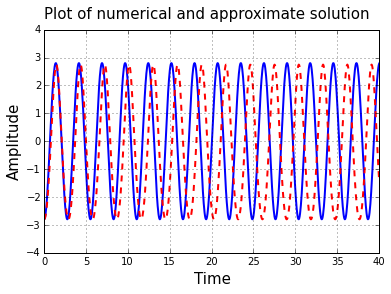

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

alpha = -2.8
epsilon = 0.1

m = 1
k1 = 2
k3 = 0.1
g = 9.81

t = np.linspace(0, 100, 2000)
response = alpha*np.cos((3*(k3/m)*epsilon*t*alpha**2 + 8*t*(k1/m + (3*k3*3.22**2)/m))/(8*np.sqrt(k1/m + (3*k3*3.22**2)/m)))

def deriv(x,t):
    return np.array([x[1], -(k1/m)*x[0] - (k3/m)*x[0]**3 + g])

yinit = np.array([0, 0])
y=odeint(deriv, yinit, t)

fig = plt.figure()
plt.plot(t, response, 'b-', linewidth = 2)
plt.plot(t, y[:,0]-2.8, 'r--', linewidth = 2)
plt.axis([0, 40, -4, 4])
fig.suptitle('Plot of numerical and approximate solution', fontsize = 15)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Amplitude', fontsize = 15)
plt.grid()
plt.show()

### Problem 2)  

$\dot{x} = x^3 + \delta x^2 - \mu x$

In [55]:
x = sp.Symbol('x', real = True)
delta = sp.Symbol('delta', real = True)
mu = sp.Symbol('mu', real = True)

Find fixed points:

In [56]:
F=x**3 + delta*x**2 - mu*x

roots = sp.solve(F, x)
roots

⎡            __________           __________⎤
⎢           ╱  2                 ╱  2       ⎥
⎢     δ   ╲╱  δ  + 4⋅μ     δ   ╲╱  δ  + 4⋅μ ⎥
⎢0, - ─ - ─────────────, - ─ + ─────────────⎥
⎣     2         2          2         2      ⎦

Next linearize the system to determine system behavior at fixed points:

In [57]:
Flin = sp.diff(F, x)
Flin

               2
2⋅δ⋅x - μ + 3⋅x 

Following the result from the linearization above the expression becomes $\dot{y} = (2 \delta x - \mu + 3 x^{2})y$, so $\lambda = 2 \delta x - \mu + 3 x^{2}$.  

**At the trivial point $x=0$, $\lambda$ becomes:**

In [58]:
lambda0 = Flin.subs(x, roots[0])
lambda0

-μ

For $x = 0$ when $\mu \le 0$ system is unstable and becomes stable when $\mu \ge 0$.

**At $x = -\frac{\delta}{2} - \frac{1}{2} \sqrt{\delta^{2} + 4 \mu}$, $\lambda$ becomes:**

In [59]:
lambda1 = Flin.subs(x, roots[1])
lambda1.simplify()

          __________      
 2       ╱  2             
δ    δ⋅╲╱  δ  + 4⋅μ       
── + ─────────────── + 2⋅μ
2           2             

**At $x = -\frac{\delta}{2} + \frac{1}{2} \sqrt{\delta^{2} + 4 \mu}$, $\lambda$ becomes:**

In [60]:
lambda2 = Flin.subs(x, roots[2])
lambda2.simplify()

          __________      
 2       ╱  2             
δ    δ⋅╲╱  δ  + 4⋅μ       
── - ─────────────── + 2⋅μ
2           2             

### Plot bifurcation diagram for various values of $\delta$:  

#### For $\delta = 0$

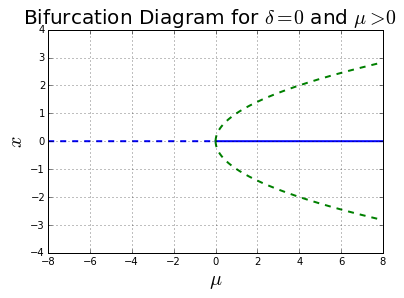

In [132]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

delta = 0
mu_neg = np.linspace(-8, 0, 500000)
mu_pos = np.linspace(0, 8, 500000)

mu_pos1 = np.linspace(-delta, 0, 500000)
mu_pos2 = np.linspace(-delta, 8, 500000)

ones = np.ones(500000, dtype=np.int)

fig=plt.figure()
#at x=0
plt.plot(mu_neg, ones*0, 'b--', linewidth=2)
plt.plot(mu_pos, ones*0, 'b-', linewidth=2)
#at x1
plt.plot(mu_pos2, -(delta/2) - (1/2)*np.sqrt(delta**2+4*mu_pos2), 'g--', linewidth=2)
plt.plot(mu_pos, -(delta/2) + (1/2)*np.sqrt(delta**2+4*mu_pos), 'g--', linewidth=2)

if delta>0.01:
    plt.plot(mu_pos1, -(delta/2) + (1/2)*np.sqrt(delta**2+4*mu_pos1), 'r-', linewidth=2)


fig.suptitle('Bifurcation Diagram for $\delta = 0$ and $\mu > 0$', fontsize=20)
plt.xlabel('$\mu$', fontsize=20)
plt.ylabel('$x$', fontsize=20)

plt.axis([-8, 8, -4, 4])
plt.grid()
plt.show()

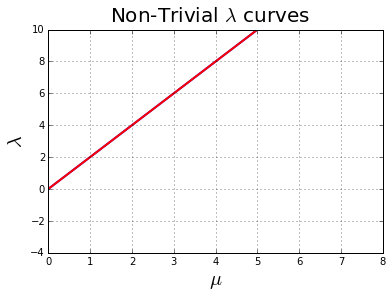

In [62]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

delta = 0
mu_neg = np.linspace(-8, 0, 500)
mu_pos = np.linspace(-delta, 8, 500)
ones = np.ones(500, dtype=np.int)

fig=plt.figure()

plt.plot(mu_pos, (delta**2/2) + (delta/2)*np.sqrt(delta**2 + 4*mu_pos) + 2*mu_pos, 'b-', linewidth=2)
plt.plot(mu_pos, (delta**2/2) - (delta/2)*np.sqrt(delta**2 + 4*mu_pos) + 2*mu_pos, 'r-', linewidth=2)

plt.axis([-delta, 8, -4, 10])
fig.suptitle('Non-Trivial $\lambda$ curves', fontsize=20)
plt.xlabel('$\mu$', fontsize=20)
plt.ylabel('$\lambda$', fontsize=20)
plt.grid()
plt.show()

#### For $\delta = 0.1$

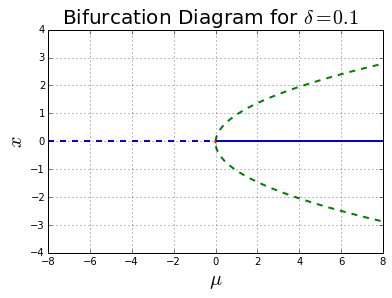

In [134]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

delta = 0.1
mu_neg = np.linspace(-8, 0, 500)
mu_pos = np.linspace(0, 8, 500)

mu_pos1 = np.linspace(-delta, 0, 500)
mu_pos2 = np.linspace(-delta, 8, 500)


ones = np.ones(500, dtype=np.int)

fig=plt.figure()
#at x=0
plt.plot(mu_neg, ones*0, 'b--', linewidth=2)
plt.plot(mu_pos, ones*0, 'b-', linewidth=2)
#at x1
plt.plot(mu_pos2, -(delta/2) - (1/2)*np.sqrt(delta**2+4*mu_pos2), 'g--', linewidth=2)
plt.plot(mu_pos, -(delta/2) + (1/2)*np.sqrt(delta**2+4*mu_pos), 'g--', linewidth=2)

if delta>0.01:
    plt.plot(mu_pos1, -(delta/2) + (1/2)*np.sqrt(delta**2+4*mu_pos1), 'r-', linewidth=2)


fig.suptitle('Bifurcation Diagram for $\delta = 0.1$', fontsize=20)
plt.xlabel('$\mu$', fontsize=20)
plt.ylabel('$x$', fontsize=20)

plt.axis([-8, 8, -4, 4])
plt.grid()
plt.show()

#### Plot zooming on to $\mu = 0$ for $\delta = 0.1$

<img src="figure delta_0_11.png" width="400">

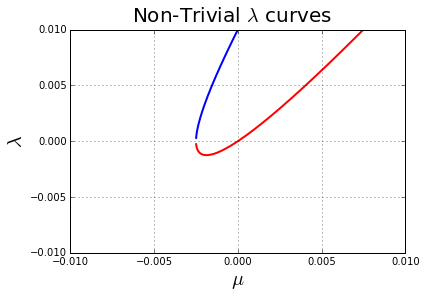

In [131]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

delta = 0.1
mu_neg = np.linspace(-8, 0, 500000)
mu_pos = np.linspace(-delta, 8, 500000)
ones = np.ones(500000, dtype=np.int)

fig=plt.figure()

plt.plot(mu_pos, (delta**2/2) + (delta/2)*np.sqrt(delta**2 + 4*mu_pos) + 2*mu_pos, 'b-', linewidth=2)
plt.plot(mu_pos, (delta**2/2) - (delta/2)*np.sqrt(delta**2 + 4*mu_pos) + 2*mu_pos, 'r-', linewidth=2)

plt.axis([-.01, 0.01, -0.01, .01])
fig.suptitle('Non-Trivial $\lambda$ curves', fontsize=20)
plt.xlabel('$\mu$', fontsize=20)
plt.ylabel('$\lambda$', fontsize=20)
plt.grid()
plt.show()

#### For $\delta = 0.5$

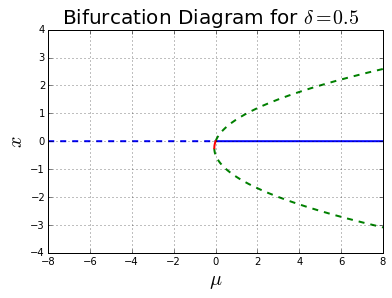

In [135]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

delta = 0.5
mu_neg = np.linspace(-8, 0, 50000)
mu_pos = np.linspace(0, 8, 50000)

mu_pos1 = np.linspace(-delta, 0, 50000)
mu_pos2 = np.linspace(-delta, 8, 50000)

ones = np.ones(50000, dtype=np.int)

fig=plt.figure()
#at x=0
plt.plot(mu_neg, ones*0, 'b--', linewidth=2)
plt.plot(mu_pos, ones*0, 'b-', linewidth=2)
#at x1
plt.plot(mu_pos2, -(delta/2) - (1/2)*np.sqrt(delta**2+4*mu_pos2), 'g--', linewidth=2)
plt.plot(mu_pos, -(delta/2) + (1/2)*np.sqrt(delta**2+4*mu_pos), 'g--', linewidth=2)

if delta>0.01:
    plt.plot(mu_pos1, -(delta/2) + (1/2)*np.sqrt(delta**2+4*mu_pos1), 'r-', linewidth=2)


fig.suptitle('Bifurcation Diagram for $\delta = 0.5$', fontsize=20)
plt.xlabel('$\mu$', fontsize=20)
plt.ylabel('$x$', fontsize=20)

plt.axis([-8, 8, -4, 4])
plt.grid()
plt.show()

#### Plot zooming on to $\mu = 0$ for $\delta = 0.5$

<img src="figure delta_0_5.png" width="400">

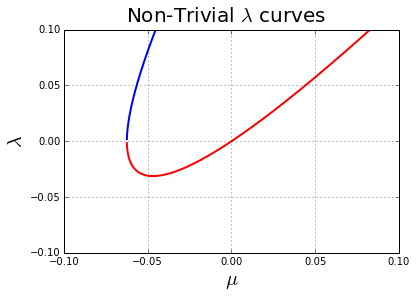

In [126]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

delta = 0.5
mu_neg = np.linspace(-8, 0, 500000)
mu_pos = np.linspace(-delta, 8, 500000)
ones = np.ones(500000, dtype=np.int)

fig=plt.figure()

plt.plot(mu_pos, (delta**2/2) + (delta/2)*np.sqrt(delta**2 + 4*mu_pos) + 2*mu_pos, 'b-', linewidth=2)
plt.plot(mu_pos, (delta**2/2) - (delta/2)*np.sqrt(delta**2 + 4*mu_pos) + 2*mu_pos, 'r-', linewidth=2)

plt.axis([-.1, 0.1, -0.1, 0.1])
fig.suptitle('Non-Trivial $\lambda$ curves', fontsize=20)
plt.xlabel('$\mu$', fontsize=20)
plt.ylabel('$\lambda$', fontsize=20)
plt.grid()
plt.show()

#### For $\delta = 2$

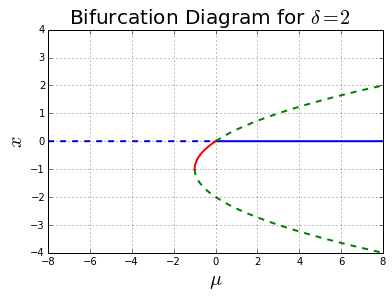

In [136]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

delta = 2
mu_neg = np.linspace(-8, 0, 500000)
mu_pos = np.linspace(0, 8, 500000)

mu_pos1 = np.linspace(-delta, 0, 500000)
mu_pos2 = np.linspace(-delta, 8, 500000)

ones = np.ones(500000, dtype=np.int)

fig=plt.figure()
#at x=0
plt.plot(mu_neg, ones*0, 'b--', linewidth=2)
plt.plot(mu_pos, ones*0, 'b-', linewidth=2)
#at x1
plt.plot(mu_pos2, -(delta/2) - (1/2)*np.sqrt(delta**2+4*mu_pos2), 'g--', linewidth=2)
plt.plot(mu_pos, -(delta/2) + (1/2)*np.sqrt(delta**2+4*mu_pos), 'g--', linewidth=2)

if delta>0.01:
    plt.plot(mu_pos1, -(delta/2) + (1/2)*np.sqrt(delta**2+4*mu_pos1), 'r-', linewidth=2)


fig.suptitle('Bifurcation Diagram for $\delta = 2$', fontsize=20)
plt.xlabel('$\mu$', fontsize=20)
plt.ylabel('$x$', fontsize=20)

plt.axis([-8, 8, -4, 4])
plt.grid()
plt.show()

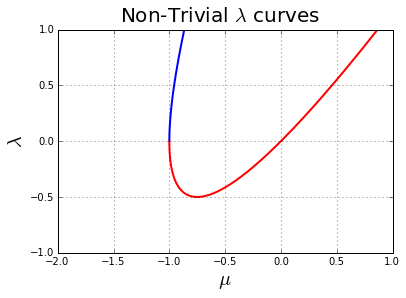

In [128]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

delta = 2
mu_neg = np.linspace(-8, 0, 500000)
mu_pos = np.linspace(-delta, 8, 500000)
ones = np.ones(500000, dtype=np.int)

fig=plt.figure()

plt.plot(mu_pos, (delta**2/2) + (delta/2)*np.sqrt(delta**2 + 4*mu_pos) + 2*mu_pos, 'b-', linewidth=2)
plt.plot(mu_pos, (delta**2/2) - (delta/2)*np.sqrt(delta**2 + 4*mu_pos) + 2*mu_pos, 'r-', linewidth=2)

plt.axis([-delta, 1, -1, 1])
fig.suptitle('Non-Trivial $\lambda$ curves', fontsize=20)
plt.xlabel('$\mu$', fontsize=20)
plt.ylabel('$\lambda$', fontsize=20)
plt.grid()
plt.show()

#### For $\delta = 4$

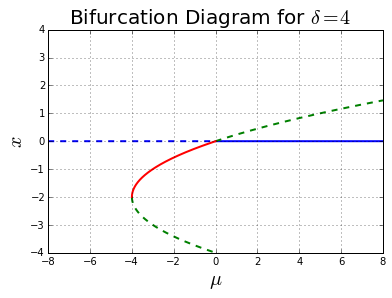

In [137]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

delta = 4
mu_neg = np.linspace(-8, 0, 500000)
mu_pos = np.linspace(0, 8, 500000)

mu_pos1 = np.linspace(-delta, 0, 500000)
mu_pos2 = np.linspace(-delta, 8, 500000)

ones = np.ones(500000, dtype=np.int)

fig=plt.figure()
#at x=0
plt.plot(mu_neg, ones*0, 'b--', linewidth=2)
plt.plot(mu_pos, ones*0, 'b-', linewidth=2)
#at x1
plt.plot(mu_pos2, -(delta/2) - (1/2)*np.sqrt(delta**2+4*mu_pos2), 'g--', linewidth=2)
plt.plot(mu_pos, -(delta/2) + (1/2)*np.sqrt(delta**2+4*mu_pos), 'g--', linewidth=2)

if delta>0.01:
    plt.plot(mu_pos1, -(delta/2) + (1/2)*np.sqrt(delta**2+4*mu_pos1), 'r-', linewidth=2)


fig.suptitle('Bifurcation Diagram for $\delta = 4$', fontsize=20)
plt.xlabel('$\mu$', fontsize=20)
plt.ylabel('$x$', fontsize=20)

plt.axis([-8, 8, -4, 4])
plt.grid()
plt.show()

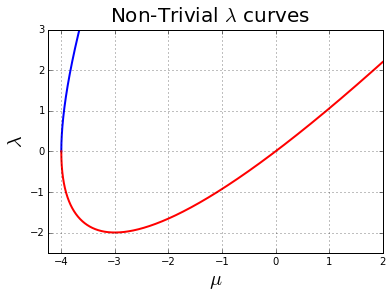

In [130]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

delta = 4
mu_neg = np.linspace(-8, 0, 500000)
mu_pos = np.linspace(-delta, 8, 500000)
ones = np.ones(500000, dtype=np.int)

fig=plt.figure()

plt.plot(mu_pos, (delta**2/2) + (delta/2)*np.sqrt(delta**2 + 4*mu_pos) + 2*mu_pos, 'b-', linewidth=2)
plt.plot(mu_pos, (delta**2/2) - (delta/2)*np.sqrt(delta**2 + 4*mu_pos) + 2*mu_pos, 'r-', linewidth=2)

plt.axis([-delta-.25, 2, -2.5, 3])
fig.suptitle('Non-Trivial $\lambda$ curves', fontsize=20)
plt.xlabel('$\mu$', fontsize=20)
plt.ylabel('$\lambda$', fontsize=20)
plt.grid()
plt.show()

In [69]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')